<br>

###  <font color="Coral">hw8pr1digits_dreamer</font>   

For this hw8pr1digits_dreamer challenge, you'll leverage how NNets are the most capable model for imputing - or "hallucinating" - or _generating_ missing data 

Here, we'll put them to the test, to <font color="DodgerBlue"><b>dream</b></font> the unseen portion of a digit, only part of which is visible:



In [ ]:
#
# Here, we have a one-pixel predictor, to get you started...


In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# let's read in our digits data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'digits.csv'
df = pd.read_csv(filename, header=0)   # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df

digits.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [5]:
#
# let's drop that last column (dropping is usually by _name_):
#
#   if you want a list of the column names use df.columns
coltodrop = df.columns[65]     # get last column name (with the url)
df_clean = df.drop(columns=[coltodrop])  # drop by name is typical
df_clean.info()                         # should be happier!
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [6]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean.columns            # "list" of columns
print(f"COLUMNS: {COLUMNS}")  

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX: {COL_INDEX}")

# and for our "SPECIES"!
SPECIES = [ str(i) for i in range(0,10) ]  # list with a string at each index (index -> string)
SPECIES_INDEX = { s:int(s) for s in SPECIES }  # dictionary mapping from string -> index

# and our "target labels"
print(f"SPECIES: {SPECIES}")  
print(f"SPECIES_INDEX: {SPECIES_INDEX}")

COLUMNS: Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')
COL_INDEX: {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23': 23, 'pix24': 24, 'pix25

In [7]:
#
# let's convert our dataframe to a numpy array, named A
#    Our ML library, scikit-learn operates entirely on numpy arrays.
#
A = df_clean.to_numpy()    # .values gets the numpy array
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(f"A's shape is {A.shape}")
print(A)

A's shape is (1768, 65)
[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [ ]:
#
# You will explore a different direction: "hallucinating" new data!
#      This is sometimes called "imputing" missing data.
#

# First, build a regressor that
#      + uses the first 48 pixels (6 image rows) to predict the floating-point value of pix52
#      + we'll see how accurate it is...
#      + then, you'll expand this process to build a regressor for _each_ pixel indexed from 48-63
#      + and use those to "imagine" the bottom two rows of the digits...

In [ ]:
#
# some starting code is provided here...
#

In [8]:
#
# regression model that uses as input the first 48 pixels (pix0 to pix47)
#                       and, as output, predicts the value of pix52
#

print("+++ Start of regression prediction of pix52! +++\n")

X_all = A[:,0:48]  ### old: np.concatenate( (A[:,0:3], A[:,4:]),axis=1)  # horizontal concatenation
y_all = A[:,52]    # y (labels) ... is all rows, column indexed 52 (pix52) only (actually the 53rd pixel, but ok)

print(f"y_all (just target values, pix52)   is \n {y_all}") 
print(f"X_all (just features: 3 rows) is \n {X_all[:3,:]}")

+++ Start of regression prediction of pix52! +++

y_all (just target values, pix52)   is 
 [ 3.  9. 10. ... 15.  7.  8.]
X_all (just features: 3 rows) is 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.]]


In [9]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_all = X_all[indices]              # we apply the _same_ permutation to each!
y_all = y_all[indices]              # again...
print("labels (target)\n",y_all)
print("features\n", X_all[:3,:])

labels (target)
 [12.  6. 12. ...  6. 15.  5.]
features
 [[ 0.  0.  1. 13. 14.  1.  0.  0.  0.  1. 11. 16. 10. 12.  0.  0.  0.  6.
  16. 15.  0. 13.  3.  0.  0.  7. 14.  5.  0.  8.  9.  0.  0.  6. 13.  0.
   0.  8. 11.  0.  0.  4. 15.  0.  1. 14.  9.  0.]
 [ 0.  0.  7. 16. 16. 10.  0.  0.  0.  0. 14. 13.  7.  4.  0.  0.  0.  5.
  16.  6.  0.  0.  0.  0.  0. 14. 15.  8.  6.  1.  0.  0.  0.  4. 12. 12.
  16. 13.  2.  0.  0.  0.  0.  0.  1. 15.  6.  0.]
 [ 0.  0.  3. 13. 16.  5.  0.  0.  0.  6. 15.  9. 15.  7.  0.  0.  0.  0.
   0.  6. 16. 10.  0.  0.  0.  0.  7. 14. 16.  3.  0.  0.  0.  0.  9. 16.
  16. 14.  3.  0.  0.  0.  0.  3.  2. 15. 10.  0.]]


In [10]:
#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [16.  7. 12. 16.  1.  0. 13. 13. 10. 14. 10.  5.  5. 16. 16.  5. 11.  5.
 16. 16. 16.  4. 12. 16.  2.  4.  3.  7.  8.  0. 16. 16. 16. 13. 12. 15.
 10. 14.  4.  8.  6.  8.  6. 10. 13. 15. 11. 12. 16.  4. 15. 12. 15.  2.
 16. 16.  6. 16. 16. 12. 13.  8.  8. 11. 13.  3. 12. 14.  2. 16.  5.  9.
 15. 13.  6. 16. 16.  1. 12. 16.  4. 15. 14.  1. 12. 16.  0.  1.  7. 14.
 12.  0. 14.  5.  1.  8. 16.  5. 16.  8. 16. 16.  9.  0. 13. 16.  5.  6.
 12.  7.  0.  0.  2. 15. 14. 16.  0. 16. 10.  1.  1.  8. 16.  5. 15. 12.
 11.  5. 16. 12.  0.  0.  8. 15.  5.  5.  3. 13. 11.  2.  6. 16.  5. 14.
 12.  4.  8. 13.  1. 12.  4. 12. 16.  5. 15. 16. 15. 16.  7. 11. 11.  8.
  4.  2. 16. 16. 14.  8. 14.  4.  5.  8. 12. 16. 16.  9.  9. 13. 16. 12.
  6.  0. 11.  4. 16. 16.  6.  5.  0. 16.  4. 14. 16. 13. 10.  7.  9.  4.
  8. 14.  5. 11.  5. 16.  4.  4.  1.  7.  2. 14.  1.  7.  4.  1.  1. 16.
 13.  4. 15. 11.  0.  0. 13. 1

In [11]:
#
# for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
#    This is done through the "StandardScaler" in scikit-learn
# 
from sklearn.preprocessing import StandardScaler
USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

# we "train the scaler"  (computes the mean and standard deviation)
if USE_SCALER == True:
    scaler = StandardScaler()
    scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
else:
    # this one does no scaling!  We still create it to be consistent:
    scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
    scaler.fit(X_train)  # still need to fit, though it does not change...

scaler   # is now defined and ready to use...

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Here is a fully-scaled dataset:

X_all_scaled = scaler.transform(X_all)
y_all_scaled = y_all.copy()      # not scaled


# Here are our scaled training and testing sets:

X_train_scaled = scaler.transform(X_train) # scale!
X_test_scaled = scaler.transform(X_test) # scale!

y_train_scaled = y_train  # the predicted/desired labels are not scaled
y_test_scaled = y_test  # not using the scaler

def ascii_table(X,y):
    """ print a table of binary inputs and outputs """
    print(f"{'input ':>70s} -> {'pred':<5s} {'des.':<5s}") 
    for i in range(len(y)):
        s_to_show = str(X[i,:])
        s_to_show = s_to_show[0:60]
        print(f"{s_to_show!s:>70s} -> {'?':<5s} {y[i]:<5.0f}")   # !s is str ...
    
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5])

#
# Note that the zeros have become -1's
# and the 1's have stayed 1's
#

                                                                input  -> pred  des. 
          [ 0.         -0.33659128  0.15936321  0.96075771  0.94555493 -> ?     6    
          [ 0.          0.7353458   0.57938108  0.25122877  0.71016502 -> ?     1    
          [ 0.         -0.33659128 -0.47066358  0.72424806 -2.58529367 -> ?     2    
          [ 0.         -0.33659128 -0.89068145 -0.93131945  0.71016502 -> ?     8    
          [ 0.         -0.33659128  0.78939001  0.01471913  0.0039953  -> ?     0    


In [12]:
#
# MLPRegressor predicts _floating-point_ outputs
#

from sklearn.neural_network import MLPRegressor

nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                    max_iter=342,          # how many training epochs
                    activation="tanh",     # the activation function
                    solver='sgd',          # the optimizer
                    verbose=True,          # do we want to watch as it trains?
                    shuffle=True,          # shuffle each epoch?
                    random_state=None,     # use for reproducibility
                    learning_rate_init=.1, # how much of each error to back-propagate
                    learning_rate = 'adaptive')  # how to handle the learning_rate

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_regressor.fit(X_train_scaled, y_train_scaled)
print("++++++++++  TRAINING:   end  +++++++++++++++")

print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_}")
print(f"And, its square root: {nn_regressor.loss_ ** 0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 17.43824293
Iteration 2, loss = 10.96065233
Iteration 3, loss = 9.46888860
Iteration 4, loss = 8.59790490
Iteration 5, loss = 8.06569791
Iteration 6, loss = 7.61696125
Iteration 7, loss = 8.43150189
Iteration 8, loss = 7.83045709
Iteration 9, loss = 8.11509184
Iteration 10, loss = 8.26664149
Iteration 11, loss = 7.33036569
Iteration 12, loss = 7.54001946
Iteration 13, loss = 7.66312755
Iteration 14, loss = 7.28745260
Iteration 15, loss = 7.22547009
Iteration 16, loss = 6.84422636
Iteration 17, loss = 6.55205455
Iteration 18, loss = 6.30517021
Iteration 19, loss = 6.20479291
Iteration 20, loss = 6.52444673
Iteration 21, loss = 6.13134975
Iteration 22, loss = 6.18523207
Iteration 23, loss = 6.57329712
Iteration 24, loss = 6.24952162
Iteration 25, loss = 6.04673707
Iteration 26, loss = 6.09994951
Iteration 27, loss = 6.55890201
Iteration 28, loss = 6.45557704
Iteration 29, loss = 6.53538294
Iteration 30, loss = 6.849955

C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
#
# how did it do? now we're making progress (by regressing)
#

def ascii_table_for_regressor(Xsc,y,nn,scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc) # all predictions
    Xpr = scaler.inverse_transform(Xsc)  # Xpr is the "X to print": unscaled data!
    # measure error
    error = 0.0
    # printing
    print(f"{'input ':>35s} ->  {'pred':^6s}  {'des.':^6s}  {'absdiff':^10s}") 
    for i in range(len(y)):
        pred = predictions[i]
        desired = y[i]
        result = abs(desired - pred)
        error += result
        # Xpr = Xsc   # if you'd like to see the scaled values
        s_to_show = str(Xpr[i,:])
        s_to_show = s_to_show[0:25]  # we'll just take 25 of these
        print(f"{s_to_show!s:>35s} ->  {pred:<+6.3f}  {desired:<+6.3f}  {result:^10.3f}") 

    print("\n" + "+++++   +++++      +++++   +++++   ")
    print(f"average abs error: {error/len(y)}")
    print("+++++   +++++      +++++   +++++   ")
    
#
# let's see how it did on the test data 
# 
if True:
    ascii_table_for_regressor(X_test_scaled,
                            y_test_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above

# and how it did on the training data!
#
if False:
    ascii_table_for_regressor(X_train_scaled,
                            y_train_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above


                             input  ->   pred    des.    absdiff  
          [ 0.00000000e+00  0.00000 ->  +13.761  +16.000    2.239   
          [ 0.00000000e+00  0.00000 ->  +7.760  +7.000    0.760   
          [ 0.00000000e+00  1.00000 ->  +13.894  +12.000    1.894   
          [ 0.00000000e+00  0.00000 ->  +8.909  +16.000    7.091   
          [ 0.00000000e+00  0.00000 ->  +8.930  +1.000    7.930   
          [ 0.00000000e+00  0.00000 ->  +4.632  +0.000    4.632   
          [ 0.00000000e+00  0.00000 ->  +14.846  +13.000    1.846   
          [ 0.00000000e+00  0.00000 ->  +13.472  +13.000    0.472   
          [ 0.00000000e+00  1.00000 ->  +4.632  +10.000    5.368   
          [ 0.00000000e+00  0.00000 ->  +14.816  +14.000    0.816   
          [ 0.00000000e+00  0.00000 ->  +11.052  +10.000    1.052   
          [ 0.00000000e+00  0.00000 ->  +3.576  +5.000    1.424   
          [ 0.00000000e+00  0.00000 ->  +4.632  +5.000    0.368   
          [ 0.00000000e+00  5.00000 ->  +13.471 

In [14]:
#
# let's create a final nn_regressor for pix52
#
pix52_final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                    max_iter=400, 
                                    activation="tanh",
                                    solver='sgd', 
                                    verbose=False, 
                                    shuffle=True,
                                    random_state=None, # reproduceability!
                                    learning_rate_init=.1, 
                                    learning_rate = 'adaptive')

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
pix52_final_regressor.fit(X_all_scaled, y_all_scaled)
print("\n\n++++++++++  TRAINING:   end  +++++++++++++++\n\n")

print(f"The (sq) prediction error (the loss) is {pix52_final_regressor.loss_}") 
print(f"So, the 'average' error per pixel is {pix52_final_regressor.loss_**0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++




++++++++++  TRAINING:   end  +++++++++++++++


The (sq) prediction error (the loss) is 3.1663834215992623
So, the 'average' error per pixel is 1.7794334552321034


C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
#
# and, let's be sure we can use our "finalized" model:
#

def predict_from_model(pixels, model):
    """ returns the prediction on the input pixels using the input model
    """
    pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
    pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
    predicted = model.predict(pixels_scaled)
    return predicted

#
# let's choose a digit to try...
#
row_to_show = 4                         # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

all_pixels = A[row_to_show,0:64] 
first48pixels = A[row_to_show,0:48] 

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} vs. {pix52_actual}")

The numeral is a 2

pix52 [predicted] vs. actual:  [13.57501057] vs. 15.0


In [ ]:
#
# Let's visualize!   Here's the idea: 
# 
# Choose a row index (row_to_show)
# Show the original digit
# Show the original digit with pix52 replaced (may not be noticeable...)
# show the original digit with the bottom-two rows zero'ed out _except_ pix 52 :-)
#

In [16]:
#
# Let's create a function to show one digit
#

def show_digit( pixels ):
    """ should create a heatmap (image) of the digit contained in row 
            input: pixels should be a 1d numpy array
            if it's more then 64 values, it will be truncated
            if it's fewer than 64 values, 0's will be appended
            
    """
    # make sure the sizes are ok!
    num_pixels = len(pixels)
    if num_pixels != 64:
        print(f"(in show_digit) num_pixels was {num_pixels}; now set to 64")
    if num_pixels > 64:   # an elif would be a poor choice here, as I found!
        pixels = pixels[0:64]
    if num_pixels < 64:   
        num_zeros = 64-len(pixels)
        pixels = np.concatenate( (pixels, np.zeros(num_zeros)), axis=0 )
        
    pixels = pixels.astype(int)         # convert to integers for plotting
    pixels = np.reshape(pixels, (8,8))  # make 8x8
    # print(f"The pixels are\n{pixels}")  
    f, ax = plt.subplots(figsize=(9, 6))  # Draw a heatmap w/option of numeric values in each cell
    
    #my_cmap = sns.dark_palette("Purple", as_cmap=True)
    my_cmap = sns.light_palette("Gray", as_cmap=True)    # all seaborn palettes: medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
    # plot! annot=True to see the values...   palettes listed at very bottom of this notebook
    sns.heatmap(pixels, annot=False, fmt="d", linewidths=.5, ax=ax, cmap=my_cmap) # 'seismic'

The numeral is a 6

pix52 [predicted] vs. actual:  [8.27160073] 12.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\3729244964.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  all_pixels[52] = np.round(pix52_predicted)    # include this one


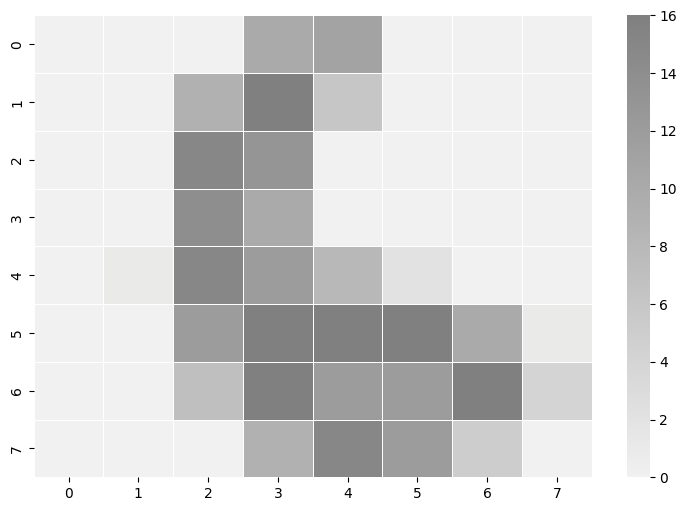

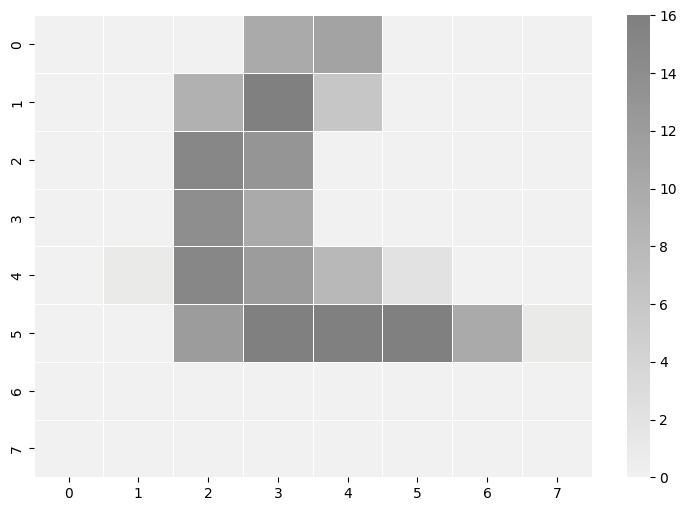

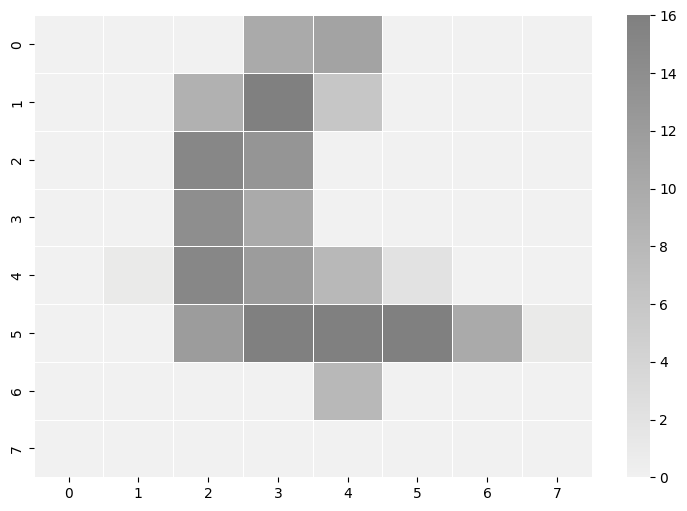

In [17]:
#
# Another example of predicting one pixel
#
row_to_show = 42                         
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:48] 

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} {pix52_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)

# show without pix52
all_pixels[52] = 0         # omit this one
show_digit( all_pixels )   # show without pixel 52

# show with pix52
all_pixels[52] = np.round(pix52_predicted)    # include this one
show_digit( all_pixels )   # show with pixel 52




<br>

## Your first task:
+ create regressors for _all_ of the pixels on the bottom two rows
+ Use a loop! 16 times is too many for copy-paste-edit!

#### Second, create a slight variation on the visualization above, so that 
+ your system "dreams" all 16 of the bottom two rows of pixels
+ You will be able to see the dreamt digit alongside the real digit
+ <font color="Coral"><b>Show three examples (real and hallucinated!)</b></font> &nbsp;&nbsp; Choose three digits from the dataset and show the original vs. the digit-dreamt version alongside each other / side-by-side in this way. 


In [42]:
#
# Adapt from the previous example:
def regressorFxn(pixelVal, row2show): # for i in range(52,64):
    X_all = A[:,0:48]  ### old: np.concatenate( (A[:,0:3], A[:,4:]),axis=1)  # horizontal concatenation
    y_all = A[:,pixelVal]    # y (labels) ... is all rows, column indexed 52 (pix52) only (actually the 53rd pixel, but ok)

    indices = np.random.permutation(len(y_all))  # indices is a permutation-list

    # we scramble both X and y, necessarily with the same permutation
    X_all = X_all[indices]              # we apply the _same_ permutation to each!
    y_all = y_all[indices]              # again...

    # X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

    from sklearn.preprocessing import StandardScaler
    USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

    # we "train the scaler"  (computes the mean and standard deviation)
    if USE_SCALER == True:
        scaler = StandardScaler()
        scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
    else:
        # this one does no scaling!  We still create it to be consistent:
        scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
        scaler.fit(X_train)  # still need to fit, though it does not change...

    scaler   # is now defined and ready to use...

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Here is a fully-scaled dataset:

    X_all_scaled = scaler.transform(X_all)
    y_all_scaled = y_all.copy()      # not scaled


    # # Here are our scaled training and testing sets:

    # X_train_scaled = scaler.transform(X_train) # scale!
    # X_test_scaled = scaler.transform(X_test) # scale!

    # y_train_scaled = y_train  # the predicted/desired labels are not scaled
    # y_test_scaled = y_test  # not using the scaler

    # nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
    #                     max_iter=342,          # how many training epochs
    #                     activation="tanh",     # the activation function
    #                     solver='sgd',          # the optimizer
    #                     verbose=True,          # do we want to watch as it trains?
    #                     shuffle=True,          # shuffle each epoch?
    #                     random_state=None,     # use for reproducibility
    #                     learning_rate_init=.1, # how much of each error to back-propagate
    #                     learning_rate = 'adaptive')  # how to handle the learning_rate

    # # print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    # nn_regressor.fit(X_train_scaled, y_train_scaled)
    # # print("++++++++++  TRAINING:   end  +++++++++++++++")

    # def ascii_table_for_regressor(Xsc,y,nn,scaler):
    #     """ a table including predictions using nn.predict """
    #     predictions = nn.predict(Xsc) # all predictions
    #     Xpr = scaler.inverse_transform(Xsc)  # Xpr is the "X to print": unscaled data!
    #     # measure error
    #     error = 0.0
    #     # printing
    #     print(f"{'input ':>35s} ->  {'pred':^6s}  {'des.':^6s}  {'absdiff':^10s}") 
    #     for i in range(len(y)):
    #         pred = predictions[i]
    #         desired = y[i]
    #         result = abs(desired - pred)
    #         error += result
    #         # Xpr = Xsc   # if you'd like to see the scaled values
    #         s_to_show = str(Xpr[i,:])
    #         s_to_show = s_to_show[0:25]  # we'll just take 25 of these
    #         print(f"{s_to_show!s:>35s} ->  {pred:<+6.3f}  {desired:<+6.3f}  {result:^10.3f}") 

    #     print("\n" + "+++++   +++++      +++++   +++++   ")
    #     print(f"average abs error: {error/len(y)}")
    #     print("+++++   +++++      +++++   +++++   ")
        
    # #
    # # let's see how it did on the test data 
    # # 
    # if True:
    #     ascii_table_for_regressor(X_test_scaled,
    #                             y_test_scaled,
    #                             nn_regressor,
    #                             scaler)   # this is our own f'n, above
        

    pix_i_final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                        max_iter=400, 
                                        activation="tanh",
                                        solver='sgd', 
                                        verbose=False, 
                                        shuffle=True,
                                        random_state=None, # reproduceability!
                                        learning_rate_init=.1, 
                                        learning_rate = 'adaptive')

    # print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    pix_i_final_regressor.fit(X_all_scaled, y_all_scaled)
    # print("\n\n++++++++++  TRAINING:   end  +++++++++++++++\n\n")


    def predict_from_model(pixels, model):
        """ returns the prediction on the input pixels using the input model
        """
        pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
        pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
        predicted = model.predict(pixels_scaled)
        return predicted

    #
    # let's choose a digit to try...
    #
    row_to_show = row2show                    # different indexing from X_all and y_all (they were reordered)
    # numeral = A[row_to_show,64]
    # print(f"The numeral is a {int(numeral)}\n")

    # all_pixels = A[row_to_show,0:64] 
    first48pixels = A[row_to_show,0:48] 

    pix_i_predicted = predict_from_model(first48pixels,pix_i_final_regressor)
    pix_i_actual = A[row_to_show,pixelVal]

    print(f"pix{pixelVal} [predicted] vs. actual:  {pix_i_predicted} vs. {pix_i_actual}")

    return pix_i_predicted



In [44]:

pixel_predicted_lists = {44: [], 48: [], 57: []}

for j in [44, 48, 57]:
    for i in range(52, 64):
        pixel_predicted_lists[j].append(float(regressorFxn(i, j)))

print(pixel_predicted_lists[44])
print(pixel_predicted_lists[48])  
print(pixel_predicted_lists[57]) 

pix52 [predicted] vs. actual:  [14.96731751] vs. 15.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix53 [predicted] vs. actual:  [0.43347733] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))
C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

pix54 [predicted] vs. actual:  [-0.03321114] vs. 0.0
pix55 [predicted] vs. actual:  [0.04761235] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix56 [predicted] vs. actual:  [0.00324877] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix57 [predicted] vs. actual:  [-0.04071955] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix58 [predicted] vs. actual:  [0.53171935] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))
C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

pix59 [predicted] vs. actual:  [5.4603222] vs. 4.0


C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix60 [predicted] vs. actual:  [14.59649851] vs. 16.0


C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix61 [predicted] vs. actual:  [3.7749392] vs. 5.0


C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix62 [predicted] vs. actual:  [0.20328041] vs. 0.0
pix63 [predicted] vs. actual:  [0.20410633] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix52 [predicted] vs. actual:  [14.03827149] vs. 13.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix53 [predicted] vs. actual:  [14.04107408] vs. 16.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix54 [predicted] vs. actual:  [1.06818824] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix55 [predicted] vs. actual:  [-0.01469527] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix56 [predicted] vs. actual:  [-0.03731023] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix57 [predicted] vs. actual:  [0.0025531] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix58 [predicted] vs. actual:  [0.50264671] vs. 1.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix59 [predicted] vs. actual:  [12.94292899] vs. 15.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))
C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

pix60 [predicted] vs. actual:  [14.29268135] vs. 14.0
pix61 [predicted] vs. actual:  [5.2016207] vs. 8.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))
C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

pix62 [predicted] vs. actual:  [0.21413768] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix63 [predicted] vs. actual:  [-0.00010134] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix52 [predicted] vs. actual:  [9.31015593] vs. 9.0
pix53 [predicted] vs. actual:  [0.30612695] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix54 [predicted] vs. actual:  [0.15250523] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix55 [predicted] vs. actual:  [-0.04012053] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix56 [predicted] vs. actual:  [0.00634273] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix57 [predicted] vs. actual:  [0.11210116] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix58 [predicted] vs. actual:  [3.75537869] vs. 4.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix59 [predicted] vs. actual:  [13.97641463] vs. 13.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix60 [predicted] vs. actual:  [0.43231109] vs. 1.0


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))
C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

pix61 [predicted] vs. actual:  [0.05395784] vs. 0.0


C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


pix62 [predicted] vs. actual:  [0.12144087] vs. 0.0
pix63 [predicted] vs. actual:  [-0.10637972] vs. 0.0
[14.96731751455387, 0.43347733141089684, -0.03321113635067974, 0.04761235055801727, 0.003248771889441046, -0.04071955048937381, 0.5317193523121384, 5.460322197033915, 14.596498513204313, 3.7749391980497125, 0.20328040882740694, 0.20410633258926936]
[14.038271494057625, 14.041074078615939, 1.068188236613393, -0.01469527023275114, -0.03731023224367835, 0.0025530960151005644, 0.5026467077046304, 12.942928986852984, 14.2926813493644, 5.201620698412471, 0.21413768411777312, -0.00010134457364052718]
[9.310155925545326, 0.3061269529985404, 0.1525052265646636, -0.04012053028648621, 0.006342728428172517, 0.11210115568817525, 3.7553786939121547, 13.97641463301471, 0.43231108772452487, 0.05395784400361325, 0.12144087226403588, -0.10637971783605238]


C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\4229356618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn(i, j)))


In [ ]:
# Part 2: visualize

The numeral is a 4

predicted value:  14.96731751455387 
predicted value:  0.43347733141089684 
predicted value:  -0.03321113635067974 
predicted value:  0.04761235055801727 
predicted value:  0.003248771889441046 
predicted value:  -0.04071955048937381 
predicted value:  0.5317193523121384 
predicted value:  5.460322197033915 
predicted value:  14.596498513204313 
predicted value:  3.7749391980497125 
predicted value:  0.20328040882740694 
predicted value:  0.20410633258926936 


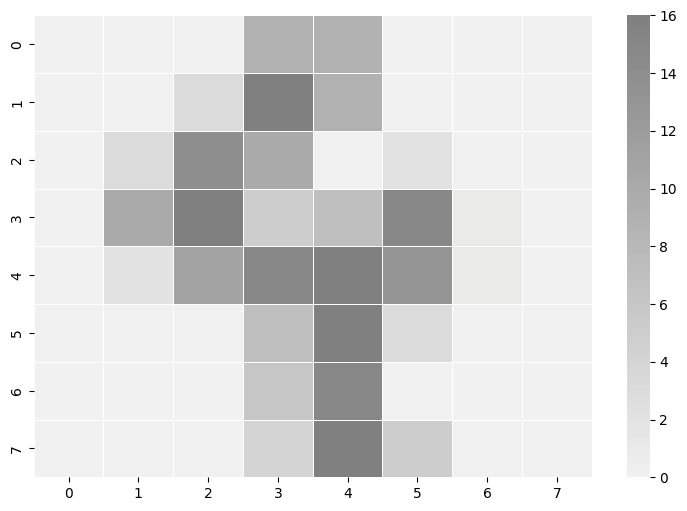

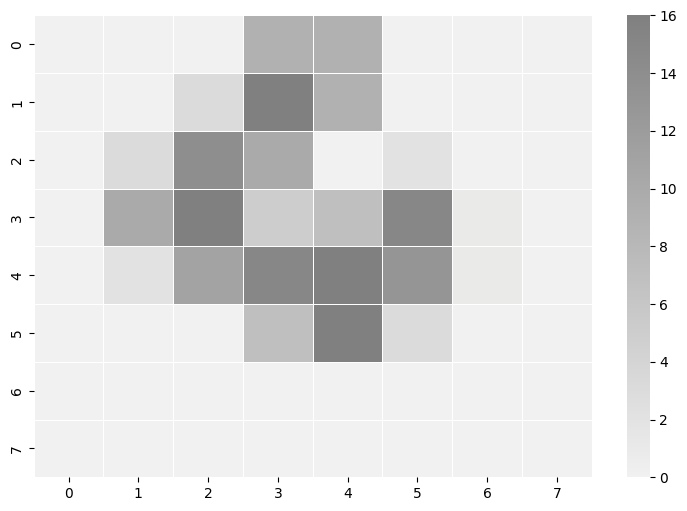

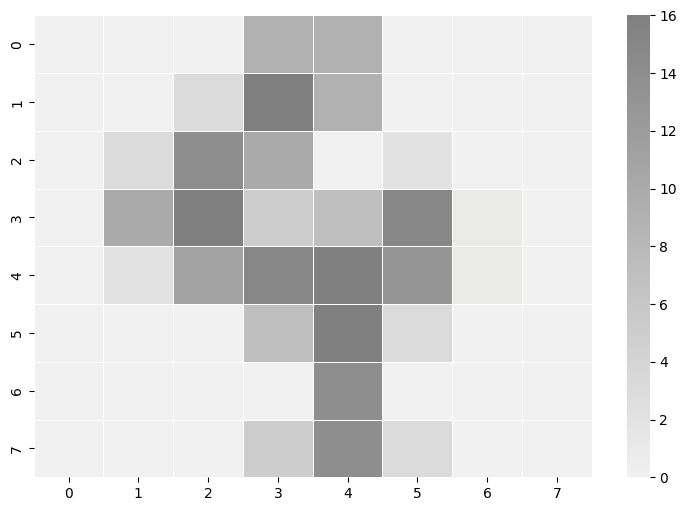

In [45]:
row_to_show = 44                        
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:48] 


for i in range(52,64):
    pix_i_predicted = pixel_predicted_lists[44][i-52]
    pix_i_actual = A[row_to_show,i]

    print(f"predicted value:  {pix_i_predicted} ") # {pix_i_actual}")

    # erase last 16 pixels
    all_pixels[48:64] = np.zeros(16)

    # show without pix52
    all_pixels[i] = 0         # omit this one

show_digit( all_pixels )   # show without pixel 52

# for i in range(52,64):
    # show with pix52-63
    # all_pixels[i] = np.round(pix_i_predicted)    # include this one

all_pixels[52:64] = pixel_predicted_lists[44]
    
show_digit( all_pixels )   # show with pixel 52

The numeral is a 0

predicted value:  14.038271494057625 
predicted value:  14.041074078615939 
predicted value:  1.068188236613393 
predicted value:  -0.01469527023275114 
predicted value:  -0.03731023224367835 
predicted value:  0.0025530960151005644 
predicted value:  0.5026467077046304 
predicted value:  12.942928986852984 
predicted value:  14.2926813493644 
predicted value:  5.201620698412471 
predicted value:  0.21413768411777312 
predicted value:  -0.00010134457364052718 


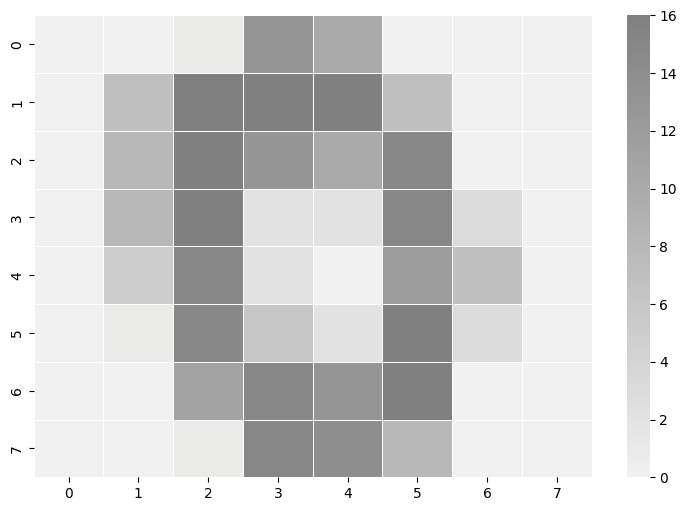

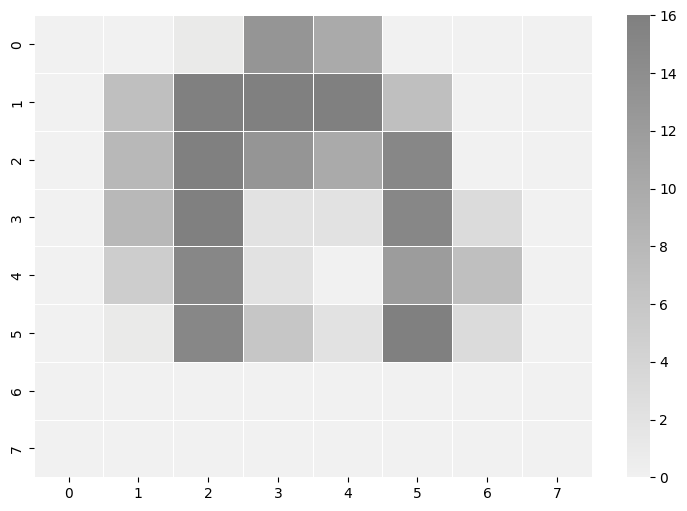

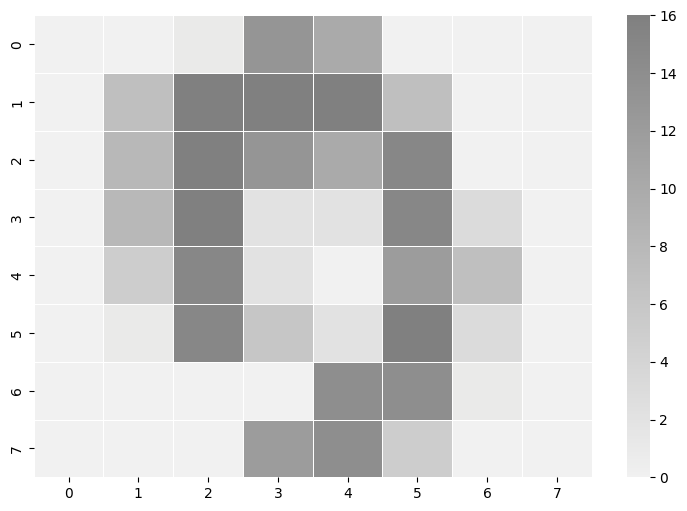

In [46]:
row_to_show = 48                        
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:48] 


for i in range(52,64):
    pix_i_predicted = pixel_predicted_lists[48][i-52]
    pix_i_actual = A[row_to_show,i]

    print(f"predicted value:  {pix_i_predicted} ") # {pix_i_actual}")

    # erase last 16 pixels
    all_pixels[48:64] = np.zeros(16)

    # show without pix52
    all_pixels[i] = 0         # omit this one

show_digit( all_pixels )   # show without pixel 52

# for i in range(52,64):
    # show with pix52-63
    # all_pixels[i] = np.round(pix_i_predicted)    # include this one

all_pixels[52:64] = pixel_predicted_lists[48]
    
show_digit( all_pixels )   # show with pixel 52

The numeral is a 7

predicted value:  9.310155925545326 
predicted value:  0.3061269529985404 
predicted value:  0.1525052265646636 
predicted value:  -0.04012053028648621 
predicted value:  0.006342728428172517 
predicted value:  0.11210115568817525 
predicted value:  3.7553786939121547 
predicted value:  13.97641463301471 
predicted value:  0.43231108772452487 
predicted value:  0.05395784400361325 
predicted value:  0.12144087226403588 
predicted value:  -0.10637971783605238 


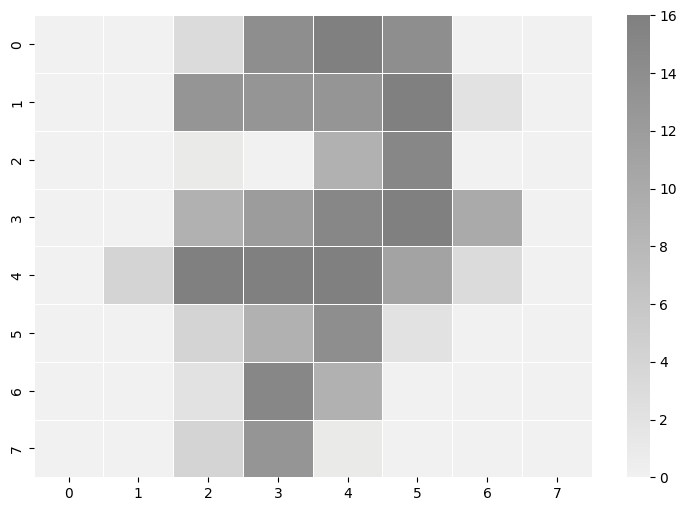

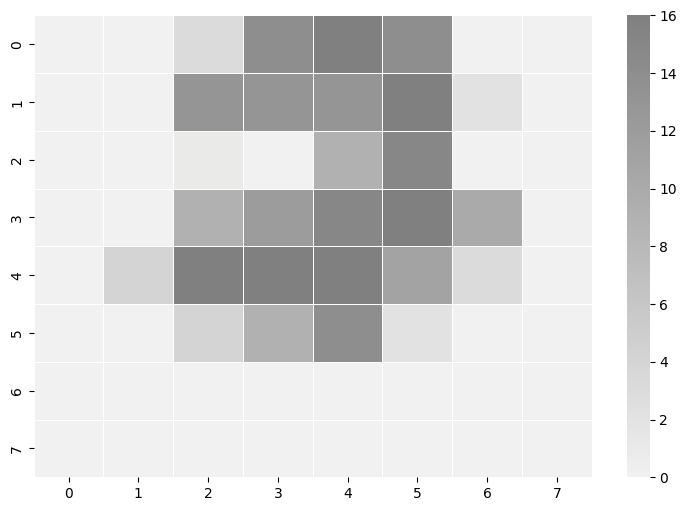

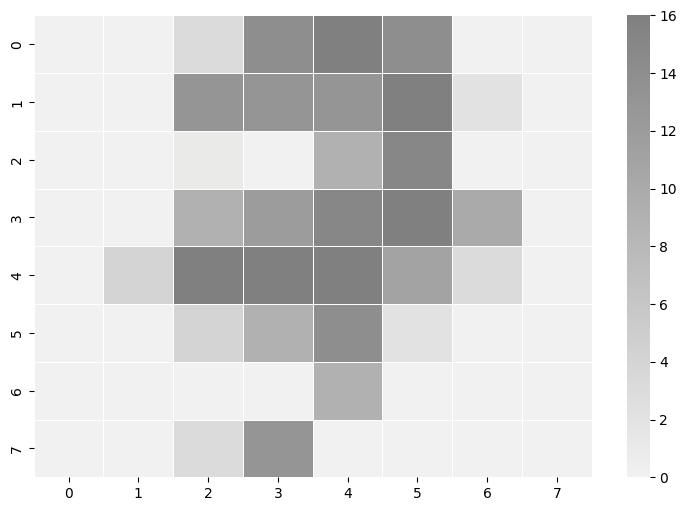

In [47]:
row_to_show = 57                        
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:48] 


for i in range(52,64):
    pix_i_predicted = pixel_predicted_lists[57][i-52]
    pix_i_actual = A[row_to_show,i]

    print(f"predicted value:  {pix_i_predicted} ") # {pix_i_actual}")

    # erase last 16 pixels
    all_pixels[48:64] = np.zeros(16)

    # show without pix52
    all_pixels[i] = 0         # omit this one

show_digit( all_pixels )   # show without pixel 52

# for i in range(52,64):
    # show with pix52-63
    # all_pixels[i] = np.round(pix_i_predicted)    # include this one

all_pixels[52:64] = pixel_predicted_lists[57]
    
show_digit( all_pixels )   # show with pixel 52

## Second task:

#### Then, predict __four__ rows, instead of two
+ Then, repeat/expand this process so that your code predicts the bottom **four** rows, instead of two
+ This time, you'll train and create 32 regressors (wow!)
+ Again, choose three digits (perhaps the same ones) and show what the system dreams for their four bottom rows vs. the actual!
+ For EC, try the bottom <b>six</b> rows -- or try the actually-unknown digits in <tt>partial_digits.csv</tt> -- and, perhaps, then try to classify the full digits the system generates from those partial ones... !

In [50]:

def regressorFxn32(pixelVal, row2show): 
    X_all = A[:,0:32]  ### old: np.concatenate( (A[:,0:3], A[:,4:]),axis=1)  # horizontal concatenation
    y_all = A[:,pixelVal]    # y (labels) ... is all rows, column indexed 52 (pix52) only (actually the 53rd pixel, but ok)

    indices = np.random.permutation(len(y_all))  # indices is a permutation-list

    # we scramble both X and y, necessarily with the same permutation
    X_all = X_all[indices]              # we apply the _same_ permutation to each!
    y_all = y_all[indices]              # again...

    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

    # from sklearn.preprocessing import StandardScaler
    USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

    if USE_SCALER == True:
        scaler = StandardScaler()
        scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
    else:
        # this one does no scaling!  We still create it to be consistent:
        scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
        scaler.fit(X_train)  # still need to fit, though it does not change...

    scaler   # is now defined and ready to use...

    X_all_scaled = scaler.transform(X_all)
    y_all_scaled = y_all.copy()      # not scaled

    pix_i_final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                        max_iter=400, 
                                        activation="tanh",
                                        solver='sgd', 
                                        verbose=False, 
                                        shuffle=True,
                                        random_state=None, # reproduceability!
                                        learning_rate_init=.1, 
                                        learning_rate = 'adaptive')

    # print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    pix_i_final_regressor.fit(X_all_scaled, y_all_scaled)
    # print("\n\n++++++++++  TRAINING:   end  +++++++++++++++\n\n")

    def predict_from_model(pixels, model):
        """ returns the prediction on the input pixels using the input model
        """
        pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
        pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
        predicted = model.predict(pixels_scaled)
        return predicted

    row_to_show = row2show                    # different indexing from X_all and y_all (they were reordered)
    # numeral = A[row_to_show,64]
    # print(f"The numeral is a {int(numeral)}\n")

    # all_pixels = A[row_to_show,0:64] 
    first32pixels = A[row_to_show,0:32] 

    pix_i_predicted = predict_from_model(first32pixels,pix_i_final_regressor)
    pix_i_actual = A[row_to_show,pixelVal]

    # print(f"pix{pixelVal} [predicted] vs. actual:  {pix_i_predicted} vs. {pix_i_actual}")

    return pix_i_predicted



In [55]:
pixel_predicted_lists = {44: [], 48: [], 57: []}

for j in [44, 48, 57]:
    for i in range(32, 64):
        pixel_predicted_lists[j].append(float(regressorFxn32(i, j)))

print(pixel_predicted_lists[44])
print(pixel_predicted_lists[48])  
print(pixel_predicted_lists[57]) 

C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\3151581623.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn32(i, j)))
C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\3151581623.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumP

[0.023651999980480714, 6.2138617723926775, 15.24634332285651, 5.184509081233948, 13.788882572097362, 14.616420343589787, 0.9395451477884547, 0.0018338559917463713, 0.03380098721584924, 2.4967512204880644, 14.19243695367459, 11.588670326301848, 15.221968306249856, 12.276084520791295, 1.0049026901737084, 0.0012618433091984294, 0.007818634966988869, -0.13350828113847868, 1.9701012087223484, 4.756458564213005, 14.725965324800988, 3.1657755610829836, 0.9973593936237952, -0.014947211233309027, 0.016006721289154445, 0.02301939734336189, 0.3229802194143625, 8.796883292272362, 14.99150312425607, 1.3472061971158986, 0.7774933890605742, 0.08355973986523091]
[-0.006091704344730997, 5.456859194510784, 12.324793602557296, 0.31156043693692137, 0.08293068950425031, 13.650972575425591, 7.8800256650044, -0.008396964686214758, 0.009732461658043035, 1.1926844677103423, 13.486437944032094, 1.1792360561192687, 7.105363549796049, 11.78786208387903, 8.673872828726408, -0.03281009343127672, -0.0336031785020642

C:\Users\CS35_Participant_12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\CS35_Participant_12\AppData\Local\Temp\ipykernel_36888\3151581623.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pixel_predicted_lists[j].append(float(regressorFxn32(i, j)))


In [56]:
print(len(pixel_predicted_lists[44]))

32


The numeral is a 4

predicted value:  0.023651999980480714 
predicted value:  6.2138617723926775 
predicted value:  15.24634332285651 
predicted value:  5.184509081233948 
predicted value:  13.788882572097362 
predicted value:  14.616420343589787 
predicted value:  0.9395451477884547 
predicted value:  0.0018338559917463713 
predicted value:  0.03380098721584924 
predicted value:  2.4967512204880644 
predicted value:  14.19243695367459 
predicted value:  11.588670326301848 
predicted value:  15.221968306249856 
predicted value:  12.276084520791295 
predicted value:  1.0049026901737084 
predicted value:  0.0012618433091984294 
predicted value:  0.007818634966988869 
predicted value:  -0.13350828113847868 
predicted value:  1.9701012087223484 
predicted value:  4.756458564213005 
predicted value:  14.725965324800988 
predicted value:  3.1657755610829836 
predicted value:  0.9973593936237952 
predicted value:  -0.014947211233309027 
predicted value:  0.016006721289154445 
predicted value:

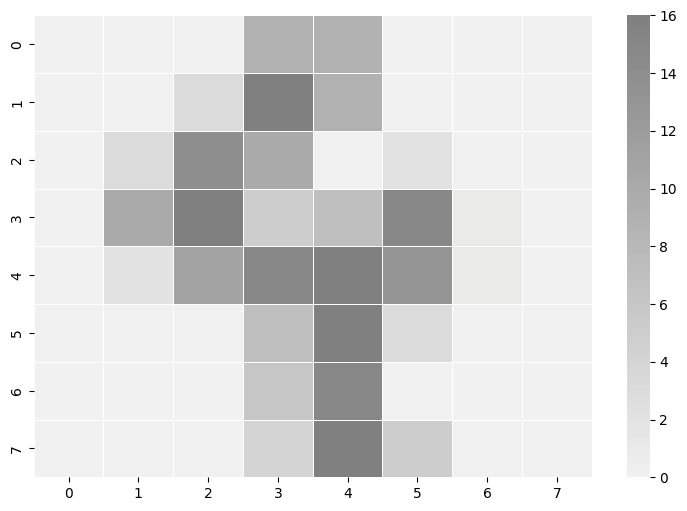

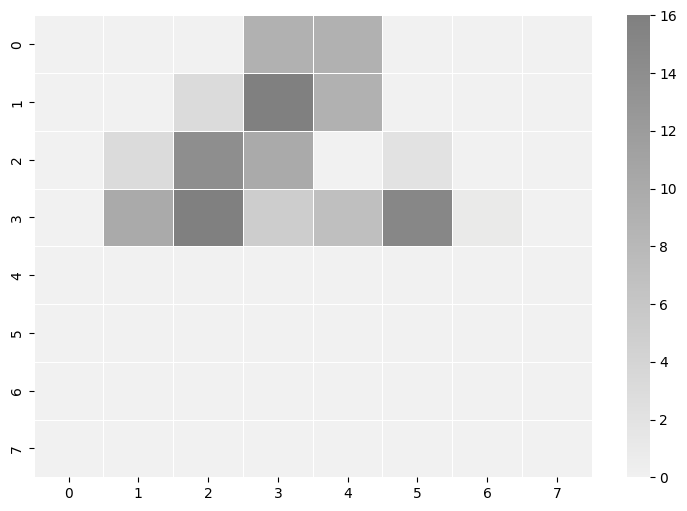

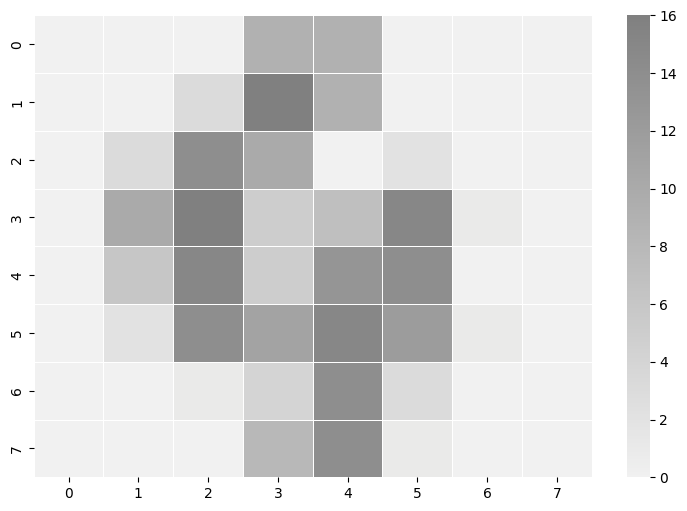

In [57]:
row_to_show = 44                        
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:32] 


for i in range(32,64):
    pix_i_predicted = pixel_predicted_lists[44][i-32]
    pix_i_actual = A[row_to_show,i]

    print(f"predicted value:  {pix_i_predicted} ") # {pix_i_actual}")

    # erase last 16 pixels
    all_pixels[32:64] = np.zeros(32)

    # show without pix52
    all_pixels[i] = 0         # omit this one

show_digit( all_pixels )   # show without pixel 52

# for i in range(52,64):
    # show with pix52-63
    # all_pixels[i] = np.round(pix_i_predicted)    # include this one

all_pixels[32:64] = pixel_predicted_lists[44]
    
show_digit( all_pixels )   # show with pixel 52

The numeral is a 0

predicted value:  -0.006091704344730997 
predicted value:  5.456859194510784 
predicted value:  12.324793602557296 
predicted value:  0.31156043693692137 
predicted value:  0.08293068950425031 
predicted value:  13.650972575425591 
predicted value:  7.8800256650044 
predicted value:  -0.008396964686214758 
predicted value:  0.009732461658043035 
predicted value:  1.1926844677103423 
predicted value:  13.486437944032094 
predicted value:  1.1792360561192687 
predicted value:  7.105363549796049 
predicted value:  11.78786208387903 
predicted value:  8.673872828726408 
predicted value:  -0.03281009343127672 
predicted value:  -0.03360317850206424 
predicted value:  -0.12607626905908198 
predicted value:  13.25978868426538 
predicted value:  10.592101036119724 
predicted value:  13.386424516584515 
predicted value:  11.504416090217457 
predicted value:  4.630582965724832 
predicted value:  0.006337635591281643 
predicted value:  -0.011992046167525916 
predicted value:  

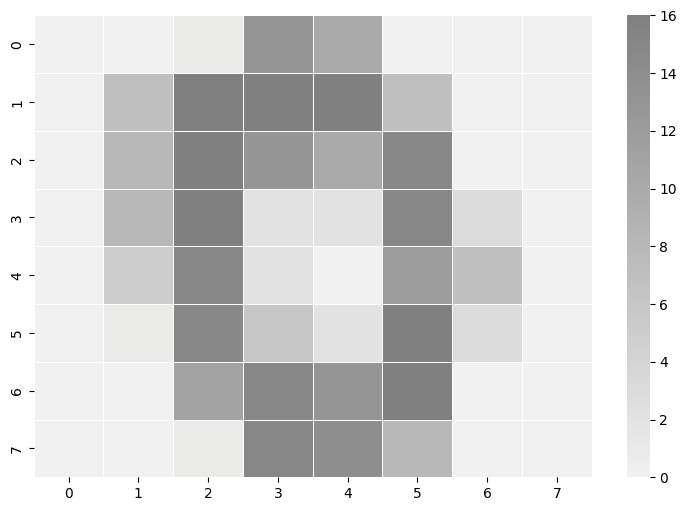

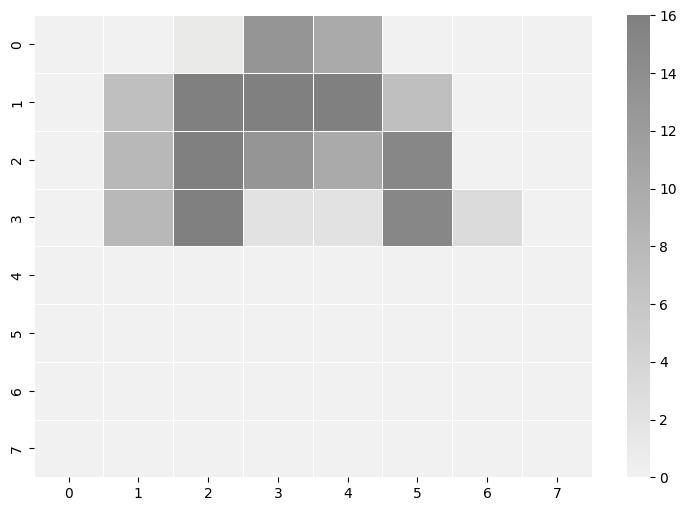

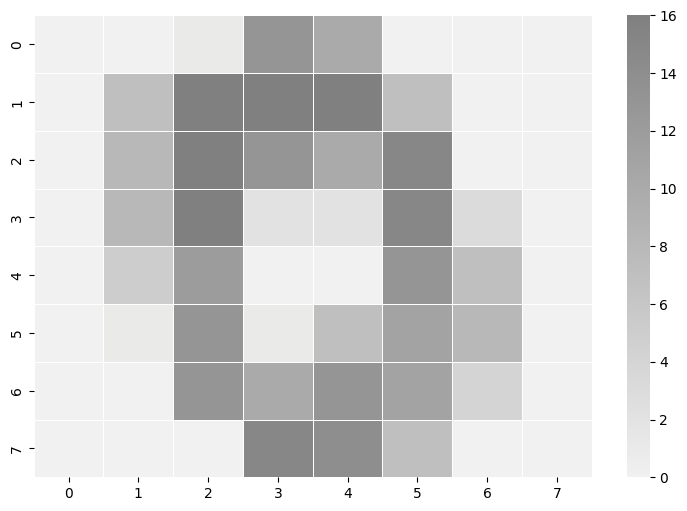

In [58]:
row_to_show = 48                       
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:32] 


for i in range(32,64):
    pix_i_predicted = pixel_predicted_lists[48][i-32]
    pix_i_actual = A[row_to_show,i]

    print(f"predicted value:  {pix_i_predicted} ") # {pix_i_actual}")

    # erase last 16 pixels
    all_pixels[32:64] = np.zeros(32)

    # show without pix52
    all_pixels[i] = 0         # omit this one

show_digit( all_pixels )   # show without pixel 52

# for i in range(52,64):
    # show with pix52-63
    # all_pixels[i] = np.round(pix_i_predicted)    # include this one

all_pixels[32:64] = pixel_predicted_lists[48]
    
show_digit( all_pixels )   # show with pixel 52

The numeral is a 7

predicted value:  0.009258708079544584 
predicted value:  5.558796148683377 
predicted value:  11.582162154551416 
predicted value:  14.048942495453566 
predicted value:  14.404226820608816 
predicted value:  11.064243189374817 
predicted value:  3.1266057269714036 
predicted value:  -0.007870616929372354 
predicted value:  0.006723441918710743 
predicted value:  0.21697707009660316 
predicted value:  6.070437418552126 
predicted value:  11.618822355295377 
predicted value:  11.729522907454388 
predicted value:  0.48717470576736854 
predicted value:  -0.46831532056244196 
predicted value:  0.012375081858624348 
predicted value:  -0.01716873149807796 
predicted value:  0.2729882331822169 
predicted value:  0.5540245853886026 
predicted value:  13.148375082770256 
predicted value:  3.980901987328499 
predicted value:  0.1369867801107958 
predicted value:  0.3554539838553863 
predicted value:  -0.09954780516066863 
predicted value:  0.0017766518333729997 
predicted val

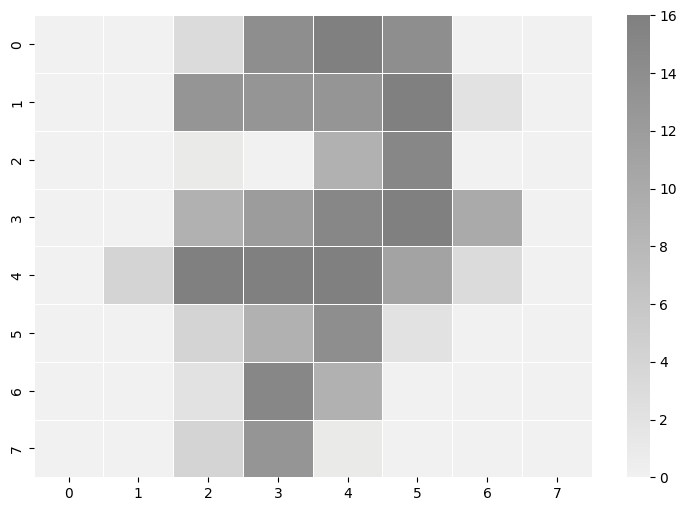

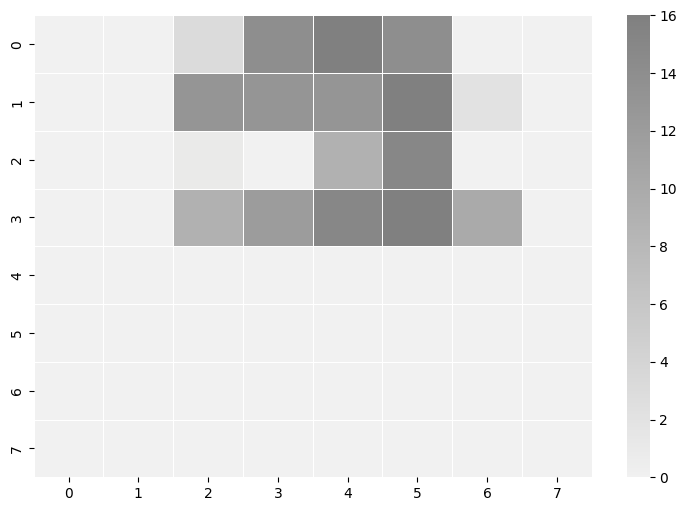

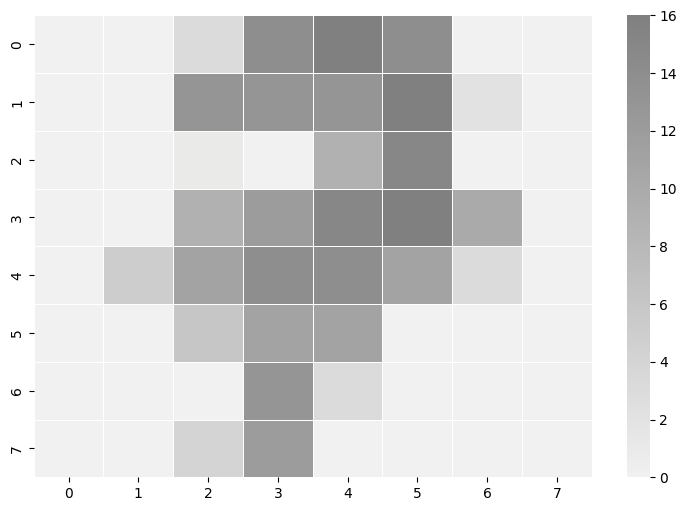

In [59]:
row_to_show = 57                       
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:32] 


for i in range(32,64):
    pix_i_predicted = pixel_predicted_lists[57][i-32]
    pix_i_actual = A[row_to_show,i]

    print(f"predicted value:  {pix_i_predicted} ") # {pix_i_actual}")

    # erase last 16 pixels
    all_pixels[32:64] = np.zeros(32)

    # show without pix52
    all_pixels[i] = 0         # omit this one

show_digit( all_pixels )   # show without pixel 52

# for i in range(52,64):
    # show with pix52-63
    # all_pixels[i] = np.round(pix_i_predicted)    # include this one

all_pixels[32:64] = pixel_predicted_lists[57]
    
show_digit( all_pixels )   # show with pixel 52

In [ ]:
"""
More details:     Your task is to expand this process, so that...

[1]
  + Your system can predict the value of _any_ of the last 16 pixels from the first 48
  +     Make sure the pixels-used and pixels-predicted are easily changed,
  +     Because this problem also asks you to predict the last 32 pixels (from the first 32...)
[2]
  + Next, predict the value of _any_ of the last 32 pixels from the first 32
  +     This will be smooth if the earlier step is modular + easily changeable
[3]
  + Create "dreamed-digit" images for four digits (your choice)
  +     Use the visualization cells above and below as starting points
  +     Make sure two out of the four use 48 pixels and predict 16
  +     Make sure two out of the four use 32 pixels and predict 32
[4a]
  + Extra!  Read in the file 'partial_digits.csv'
  +     there are 10 digits with _only_ the first six rows (48 pixels)   [the last 16 are artificially set to 0]
  +     there are 10 digits with _only_ the first four rows (32 pixels)  [the last 32 are artificially set to 0]
  +     And, hallucinate the missing data! (just as above)  Visualize!
[4b]
  + Extra!  Then, _Classify_ those newly-imputed digits, using the "dreamt pixels"
  +     (Remember you created a classification network in pr2.)
  +     How does it do?
  +     Compare with how it does if you leave the zeros in the data...


Steps [1]-[3] is an example of "imputing" missing data, and then the EC uses this hallucinated (imputed) data 
so that the original digit-classifier would work.

_Any_ modeling technique can be used to impute missing data. It can be complex (NNet or RF)
or very simple, e.g., replace missing data with the average value of that feature in the dataset. 

In this spirit, check out Google's "Deep Dream" and its "Inceptionism" gallery, e.g.,
https://photos.google.com/share/AF1QipPX0SCl7OzWilt9LnuQliattX4OUCj_8EP65_cTVnBmS1jnYgsGQAieQUc1VQWdgQ?pli=1&key=aVBxWjhwSzg2RjJWLWRuVFBBZEN1d205bUdEMnhB

in which the effects (the weights) learned by the network are allowed to "spill out" into other images.
This is different than the _generated-image_ artifacts (now familiar) ...

Here, it's the weights themselves that are _intentionally_ visualized!
"""